<a href="https://colab.research.google.com/github/Ngoson2004/Deep-Learning-for-Vietnamese/blob/main/Logistic_Regression_for_VietnamBankCustomer_dataset_Week1_ForwardProp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hồi quy Logistics (Logistic Regression)

HỒi quy Logistic, hay còn gọi là Logistic Regression, là một trong những thuật toán cơ bản nhất của Học máy. Logistic Regression thường được sử dụng để phân loại một đối tượng dựa trên những đặc điểm có sẵn của đối tượng đấy. Ví dụ, một bác sĩ muốn làm xét nghiệm trên bệnh nhân bị bệnh về u bướu. Khối u đó có thể lành tính hoặc ác tính.

Logistic regression có thể được áp dụng vào việc xét nghiệm này, vì nó có thể phân loại khối u thành 2 nhóm: lành tính hoặc ác tính, dựa trên việc xử lí những dữ liệu có sẵn về khối u như kích cỡ và vị trí.


Trong notebook này, chúng ta sẽ sử dụng thuật toán Logistic Regression để dự đoán khả năng một nguời có gửi tiền vào ngân hàng theo kì hạn hay không. Ta sẽ dựa vào một số thông tin như là tuổi, số dư ngân hàng, trình độ học vấn, vv.

## Mục lục

## 1. Khởi động


Trước tiên, ta phải nhập về các thư viện cần thiết

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

Sau đó là nhập data. Chúng ta sẽ cho bạn thấy data mà chúng ta chuẩn bị làm việc này trông như thế nào.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/BankCustomerData.csv')
df.head()
#print(df.head())

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,term_deposit
0,1,58,management,2,tertiary,0,2143,1,0,5,may,261,1,-1,0,0
1,2,44,technician,1,secondary,0,29,1,0,5,may,151,1,-1,0,0
2,3,33,entrepreneur,2,secondary,0,2,1,1,5,may,76,1,-1,0,0
3,4,47,blue-collar,2,unknown,0,1506,1,0,5,may,92,1,-1,0,0
4,5,33,unknown,1,unknown,0,1,0,0,5,may,198,1,-1,0,0


In [ ]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'term_deposit'],
      dtype='object')

In [ ]:
np.shape(df)

(42639, 16)

Như bạn đã thấy, thuật toán của chúng ta có thể dự đoán một người có gửi tiền hay không dựa vào những số liệu như tuổi, nghề nghiệp, số dư ngân hàng, vv. Tổng cộng ta có gần 43 nghìn hàng và 16 cột.

Nếu bạn để ý, ta có một cột "term_deposit". Cột này được gọi là **ground-truth label**, hay còn gọi là "sự thật nền tảng". Đúng như tên gọi của nó, model sẽ lấy cột này làm nền tảng cho việc dự đoán, vì nó là kết quả cuối cùng ghi lại được của một người: cô ấy/ anh ấy có gửi tiền hay không.

Bây giờ chúng ta sẽ bắt đầu xử lí data

## 2. Xử lí và chiết xuất data

In [ ]:
df.isna().sum()

ID              0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
term_deposit    0
dtype: int64

Nếu dữ liệu của chúng ta có giá trị nào đó rỗng (không được xác định), ta cần loại bỏ chúng. Vì nếu ta để nguyên, toàn bộ quá trình training của ta sẽ bị hỏng. May mắn thay, câu lệnh bên trên cho thấy không có giá trị nào trong dataset bị rỗng.

Tuy nhiên, để chạy được logistic regression, tất cả các cột dữ liệu của chúng ta đều phải ở dạng số nguyên (int) hoặc số thập phân (float). Vậy nên những cột có dữ liệu văn bản (string) như Job và Education sẽ cần phải được chuyển sang dạng số.

Ngoài ra, một số cột không cần thiết như ID, thời gian sẽ cần phải được lược bỏ. Chúng không giúp ích được nhiều cho việc dự đoán.

In [ ]:
df = df.drop(['ID', 'day', 'month'], axis=1)

Để chuyển hoá các dữ liệu văn bản thành dạng số, ta có thể dùng hàm LabelEncoder từ thư viện scikit-learn. Hàm này sẽ chia các giá trị thành các tập hợp khác nhau, văn bản giống nhau thì cho vào cùng một tập. Sau dó, LabelEncoder sẽ đánh số các mỗi tập. Ví dụ, với cột "trình độ học vấn" (education), "có bằng đại học" sẽ được đánh số 2, "có bằng trung học" được đánh số 1, vv,

Phương pháp này được gọi là "mã hoá nhãn" (**label encoding**). Phương pháp này rất hiệu quả cho những dữ liệu hạng mục (**categorical**) dạng văn bản như "trình độ học vấn" hay "nghề nghiệp".

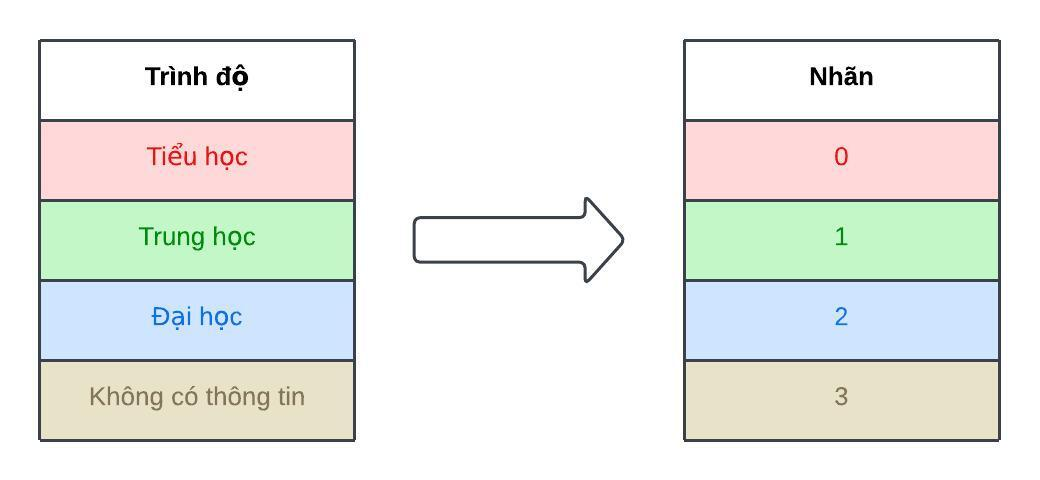

*Ảnh 1. Mã hoá nhãn cho cột Trình độ học vấn (Education)*

Ngoài ra còn một phương pháp nữa gọi là **one-hot encoding** (mã hoá one-hot). Đây là một phương pháp truyền thống hơn dể mã hoá những dữ liệu hạng mục thành dạng nhị phân (binary). Theo TabML, phương pháp này được định nghĩa như sau:

> *Trong cách mã hóa này, một “từ điển” cần được xây dựng chứa tất cả các giá trị khả dĩ của từng dữ liệu hạng mục. Sau đó mỗi giá trị hạng mục sẽ được mã hóa bằng một vector nhị phân với toàn bộ các phần tử bằng 0 trừ một phần tử bằng 1 tương ứng với vị trí của giá trị hạng mục đó trong từ điển.*

Đối với dữ liệu của chúng ta, one-hot encoding sẽ được áp dụng với cột tình trạng hôn nhân (marital status). Vậy với mỗi khách hàng, marital status của họ sẽ được mã hoá thành một đoạn nhị phân 3 số. Mã này có thể là (0,0,1), (0,1,0) hoặc (1,0,0).

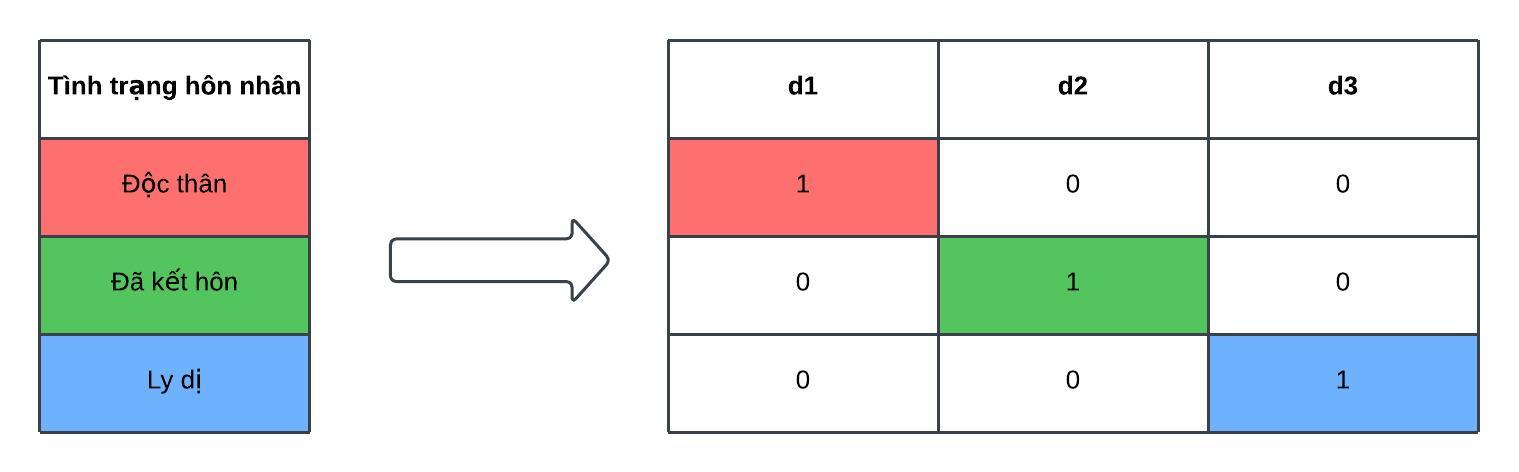

*Ảnh 2. Mã hoá one-hot.*

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

job_encoder = LabelEncoder()
education_encoder = LabelEncoder()

df['job'] = job_encoder.fit_transform(df['job'])
df['education'] = education_encoder.fit_transform(df['education'])
df_processed = pd.get_dummies(df, columns=['marital'], dtype=float)
df_processed.loc[df_processed['pdays'] < 0, 'pdays'] = 0

In [ ]:
df_processed.head()
#print(df.head())

,age,job,education,default,balance,housing,loan,duration,campaign,pdays,previous,term_deposit,marital_0,marital_1,marital_2
0,58,4,2,0,2143,1,0,261,1,0,0,0,0.0,0.0,1.0
1,44,9,1,0,29,1,0,151,1,0,0,0,0.0,1.0,0.0
2,33,2,1,0,2,1,1,76,1,0,0,0,0.0,0.0,1.0
3,47,1,3,0,1506,1,0,92,1,0,0,0,0.0,0.0,1.0
4,33,11,3,0,1,0,0,198,1,0,0,0,0.0,1.0,0.0


Ta đã thấy cột Job và Education được chuyển về dạng số, còn cột marital được chuyển thành 3 cột nhị phân.

In [ ]:
print("(Số hàng, số cột)", np.shape(df_processed))

(Số hàng, số cột) (42639, 15)


Ngoài ra, ta cũng cần kiểm tra **multi-collinearity** (đa cộng tuyến) giữa các đại lượng trong dữ liệu. Multi-collinearity là một hiện tượng trong phân tích hồi quy khi mà hai hoặc nhiều biến độc lập trong mô hình có tương quan mạnh mẽ với nhau. 2 đại lượng A và B có tương quan với nhau khi A thay đổi thì B cũng thay đổi.

Khi xử lí dữ liệu cho logistic regression, ta cần phải xem đại lượng nào có ảnh hưởng đến kết quả dự đoán nhiều nhất. Đối với bài toán dự đoán dữ liệu ngân hàng của chúng ta, ta cần phải xem giá trị nào có tương quan nhiều nhất với ground-truth label (term_deposit).

Đề làm được điều đó, hãy nhìn vào tấm biểu đồ này.

<Axes: title={'center': 'Biểu đồ hệ số tương quan giữa các cột giá trị'}>

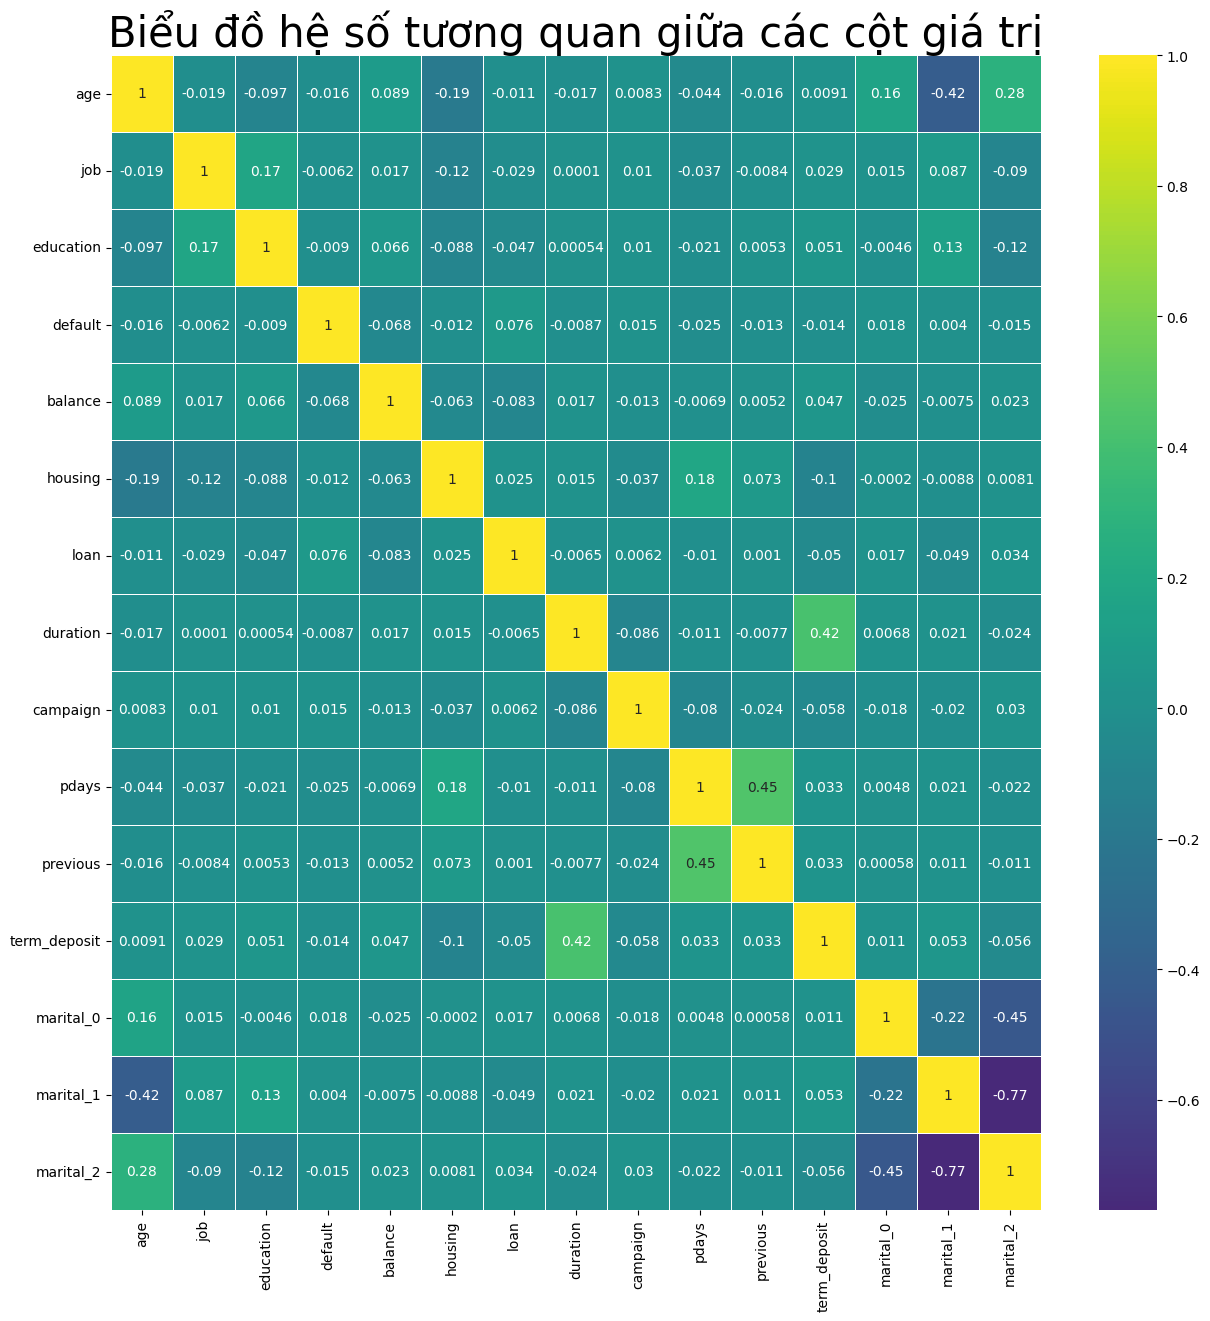

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 15))
plt.title("Biểu đồ hệ số tương quan giữa các cột giá trị", fontsize=30)
sns.heatmap(df_processed.corr(), center=0, linewidths=0.5, cmap="viridis", annot=True)

Mỗi một ô vuông chứa một con số. Con số này là **correlation coefficient** (hệ số tương quan). Giá trị tuyệt đối của số càng lớn (càng gần 1), 2 đại lượng đó càng tương quan với nhau. nếu hệ số tương quan dương thì 2 giá trị đó tỉ lệ thuận, còn âm thì ngược lại.

Hãy nhìn vào phần term_deposit của biểu đồ, ta sẽ loại đi những đại lượng có correlation coefficient cao (>0.5 hoặc <-0.5). Vì corellation coefficient cao đồng nghĩa với việc hai giá trị đó giống nhau. Vậy nên ta nên loại bỏ một trong hai.

Hiện tại chưa có đại lượng nào có correlation coefficient so với term_deposit bị cao quá.

In [ ]:
X_data = df_final.drop(['term_deposit'], axis=1)
y_data = df_final['term_deposit']

In [ ]:
X_data, y_data = X_data.to_numpy(), y_data.to_numpy()

In [ ]:
print("Hình dạng tập đầu vào X; ", np.shape(X_data))

Hình dạng tập đầu vào X;  (42639, 13)


In [ ]:
X_data
#print(X_data)

array([[4., 2., 0., ..., 0., 0., 1.],
       [9., 1., 0., ..., 0., 1., 0.],
       [2., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [8., 1., 0., ..., 0., 1., 0.],
       [4., 2., 0., ..., 0., 1., 0.]])

In [ ]:
print("Hình dạng của sự thật nền tảng: ", np.shape(y_data))

Hình dạng của sự thật nền tảng:  (42639,)


Khi làm việc với dữ liệu bảng, việc để một chiều bị khuyết như trên có thể tạo lỗi khi luyện model về sau. Vậy nên ta cần chỉnh cho cột Y này có thêm một chiều nữa.

In [ ]:
y_data = y_data.reshape((42639,1))

In [ ]:
print("Hình dạng của sự thật nền tảng sau khi xử lí:", np.shape(y_data))

Hình dạng của sự thật nền tảng sau khi xử lí: (42639, 1)


In [ ]:
y_data

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

Ngoài ra, mỗi cột dữ liệu của chúng ta có biên độ dữ liệu khác nhau (khoảng cách giữa giá trị lớn nhất và nhỏ nhất). Điều này có thể làm khó việc dự đoán của thuật toán. Vậy nên, việc scale lại dữ liệu sao cho đồng đều là cần thiết.

Để scale lại data, ta dùng hàm StandardScaler từ thư viện scikit-learn. Hàm này scale lại các giá trị z trong dữ liệu dựa vào công thức:

\begin{equation} z = \frac{x - \mu}{\sigma} \end{equation}

Ở đây, x là từng giá trị ở trong tập data, μ là trung bình cộng của các giá trị trong một cột, còn σ là độ lệch chuẩn của các giá trị trong cột đó.

In [ ]:
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)

Ngoài ra, ta phải tách tập X và tập Y, mỗi cái thành 2 tập mới, một tập dùng cho training (luyện mô hình), một tập dùng cho validation (đánh gía hiệu quả của mô hình).

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2)
print("Kích thước tập X dùng cho training: ",np.shape(X_train))
print("Kích thước tập Y dùng cho training: ",np.shape(y_train))
print("Kích thước tập X dùng cho validation: ",np.shape(X_val))
print("Kích thước tập Y dùng để cho validation: ",np.shape(y_val))

Kích thước tập X dùng cho training:  (34111, 13)
Kích thước tập Y dùng cho training:  (34111, 1)
Kích thước tập X dùng cho validation:  (8528, 13)
Kích thước tập Y dùng để cho validation:  (8528, 1)


Chúng ta đã hoàn thành bước xử lí dữ liệu. Tập dữ liệu X cuối cùng có 13 cột, tương ứng với 13 đại lượng. Tập training có tổng cộng gần 31 nghìn mẫu, còn validation là tầm 8500 mẫu. Mỗi mẫu này tương ứng với một khách hàng.

## 3. Xây mô hình Neural Network dùng thuật toán Logistic Regression



Khi đã chuẩn bị data xong, ta sẽ thực hiện Logistic Regression trên data. Và để sự dụng Logistic Regression một cách hiệu quả, ta cần phải xây dựng một thứ gọi là Neural Network (mạng lưới neuron). Mạng lưới này có nhiệm vụ dự đoán một người có gửi tiền hay không dựa trên những thông tin ta truyền vào nó. Đây là một mạng lưới có khả năng học máy (machine learning). Nói cách khác, ta cho Neural Network tiếp xúc với data, và chúng sẽ tự cải thiện khả năng của mình bằng cách điều chỉnh các tham số tương úng. Quá trình này gọi là training.

Nếu bạn vẫn thấy khó hiểu, đừng lo, ta sẽ cùng nhau làm rõ các khái niệm ở các phần tiếp theo.

NOTE: ở phần tiếp theo, chúng ta sẽ dùng từ model thay cho Neural Network. Nghĩa của
chúng tương tự nhau.


---



### 3a. Cấu trúc
Model của chúng ta sắp xây sẽ có cấu trúc như sau:

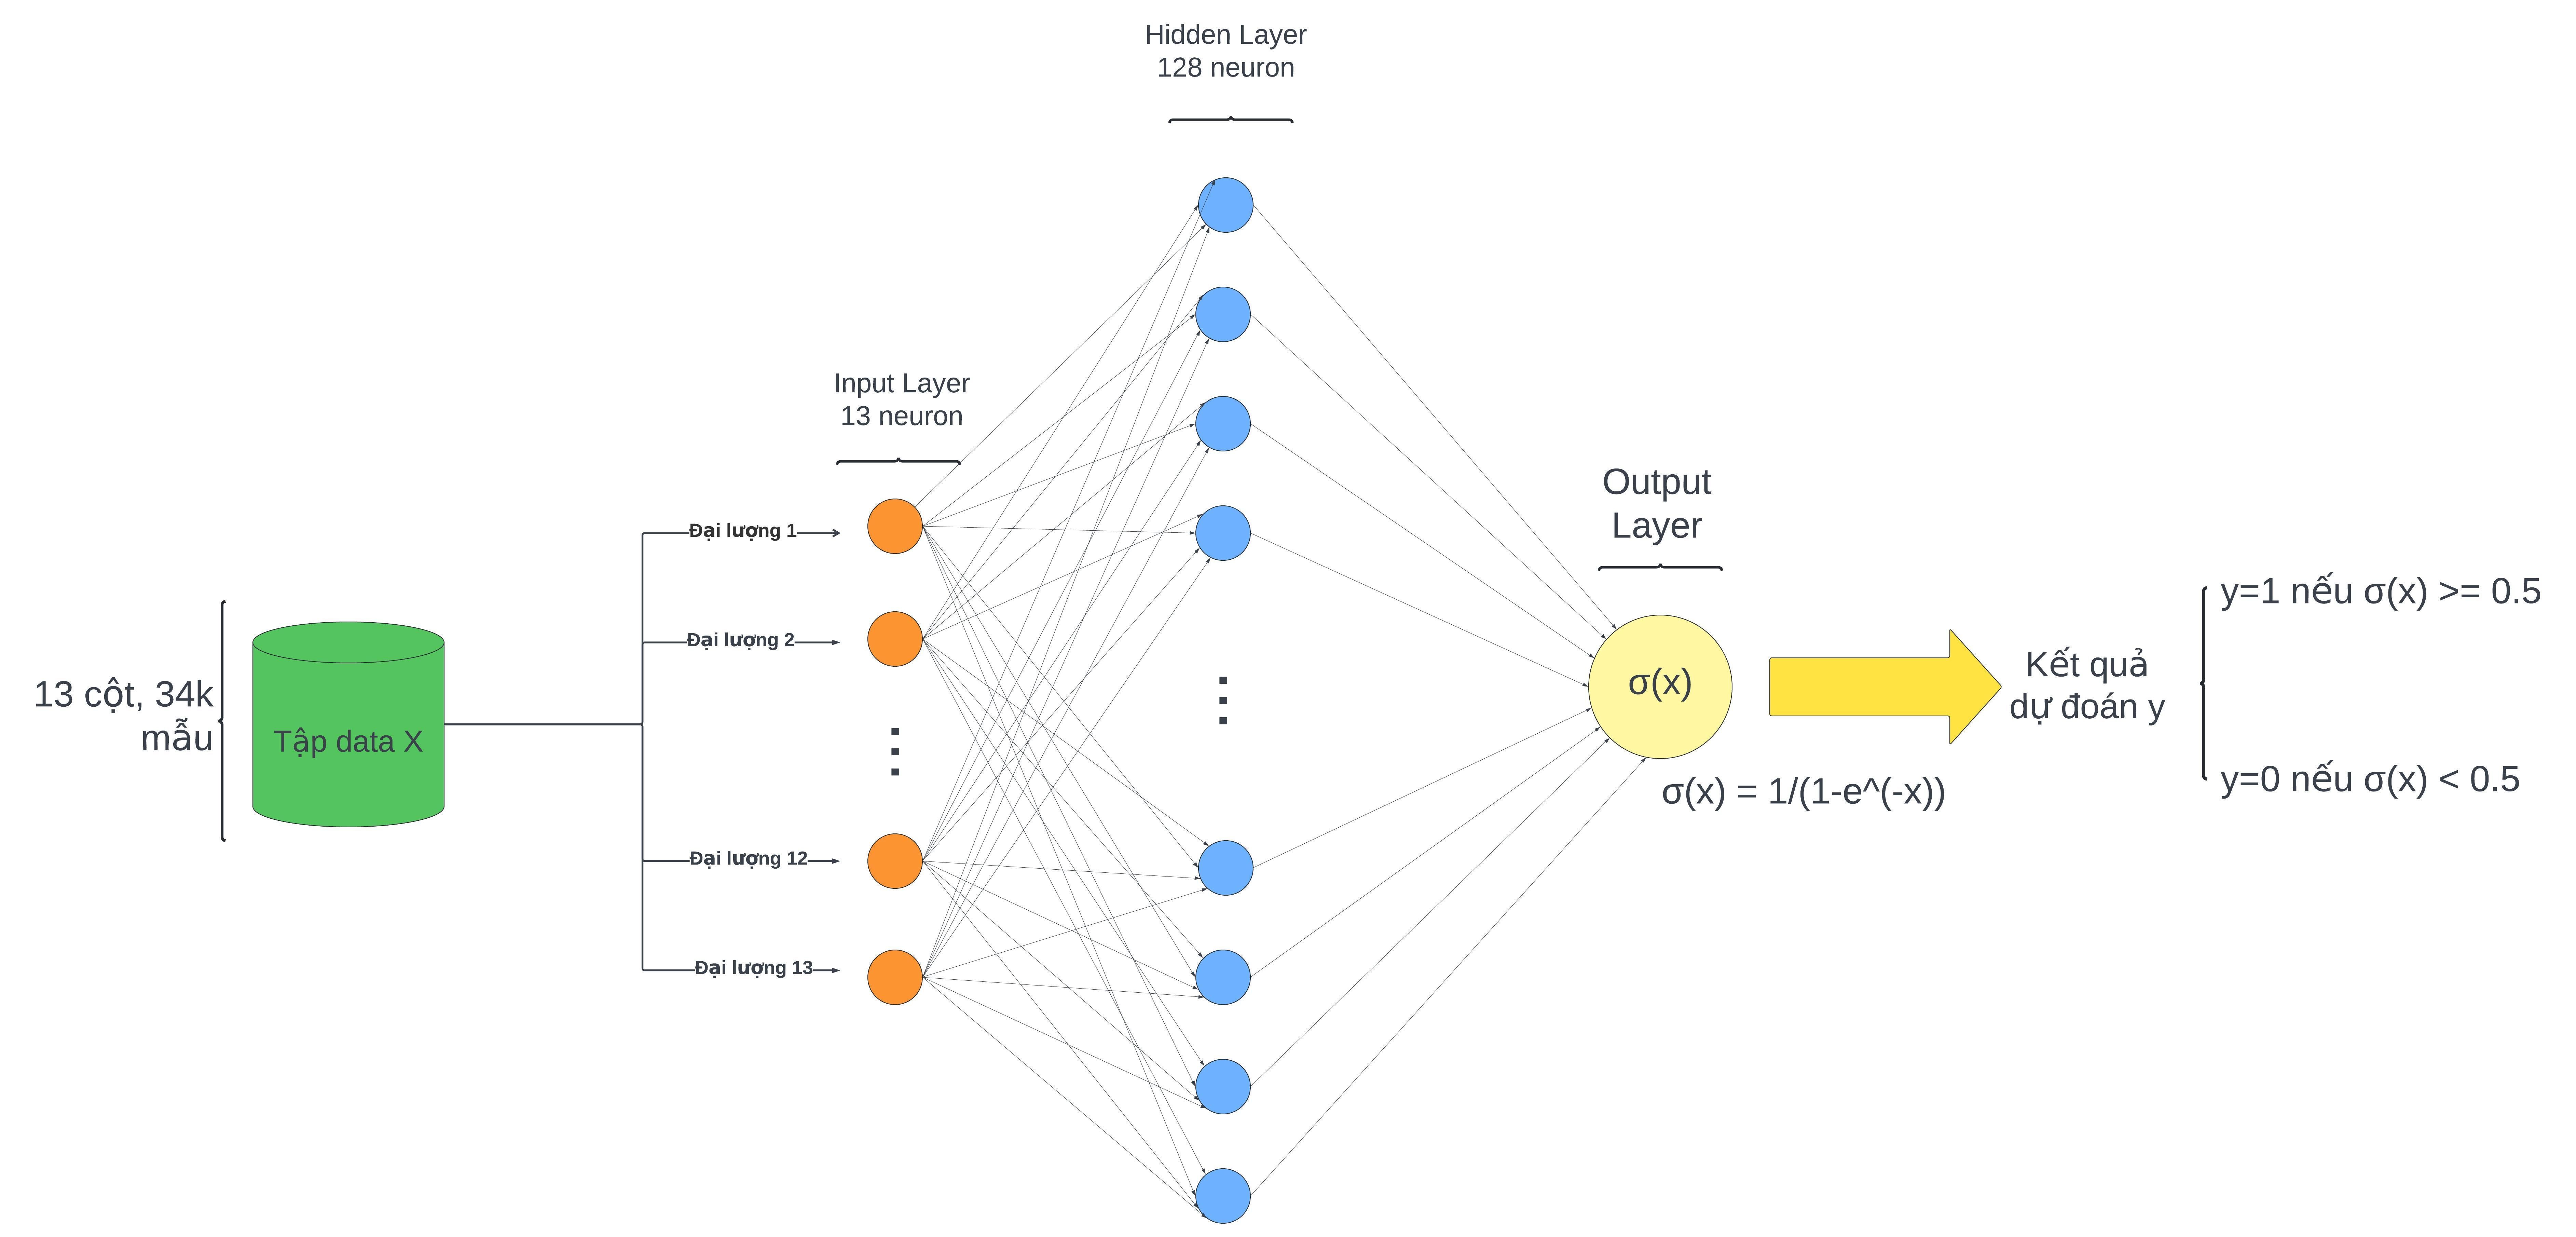

*Ảnh 4. Cấu trúc của Neural Network đơn giản*

Neural Network được tạo nên bởi các lớp (layer) khác nhau, mỗi layer gồm nhiều đơn vị, gọi là neuron. Mỗi neuron này đại diện cho một phương trình toán học và các tham số tương ứng. Neural Network bao gồm 3 kiểu lớp chính:
*   Lớp đầu vào (Input layer): Đây là lớp tiếp nhận data để bắt đầu quá trình phát triển thuật toán. Số neuron ở lớp này bằng với số cột trong data của chúng ta. Từ đó, mỗi neuron sẽ phụ trách xử lí một đại lượng.
*   Lớp ẩn (Hidden layer): Neural Network có thể bao gồm 1 hoặc nhiều lớp ẩn. Các lớp này sẽ tiếp nhận kết quả tính toán dưới dạng vector từ lớp đầu vào, rồi tiếp tục tính toán và điều chỉnh tham số ở các neuron.
*   Lớp đầu ra (Output layer): Lớp đầu ra sẽ bao gồm duy nhất 1 neuron, chịu trách nhiệm đưa ra kết quả dự đoán cuối cùng.

### 3b. Cơ chế
Đối với bài toán Binary Classification, ta dùng 3 phương trình chính sau đây cho model.

1. ### Linear
\begin{equation} y = wx + b \end{equation}

Đây sẽ là phương trình được dùng chủ yếu trong các neuron của Input Layer và Hidden Layer. x là data đầu vào, y là kết quả, còn **w** và **b** là những tham số. Cụ thể hơn, ta gọi w là **trọng số** (w), còn b là **độ thiên lệch** (bias). Mục tiêu của Neural Network chính là điều chỉnh w và b sao cho y đạt được như mong muốn.

Weight và bias là 2 đại lượng rất quan trọng trong AI nói chung và machine learning nói riêng. Giá trị của chúng có ảnh hưởng rất nhiều, nếu không nói là quyết định hiệu quả của model.

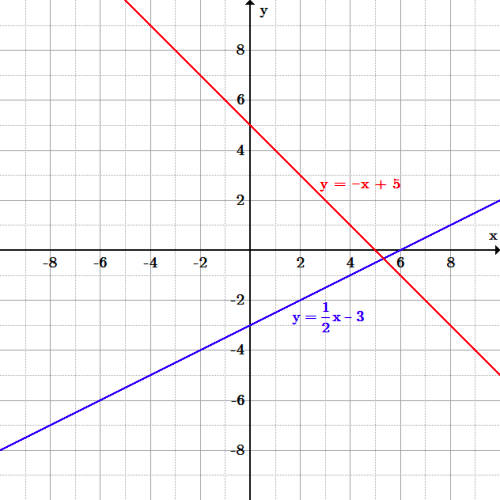

2. ### ReLU
\begin{equation} \text{ReLU}(x) = \max(0, x)\end{equation}

Hàm ReLU thường được đặt giữa các Hidden Layer để xử lí đầu ra từ hàm linear. Hàm này sẽ lọc ra những output > 0. Nếu output < 0, hàm này sẽ trả về 0.

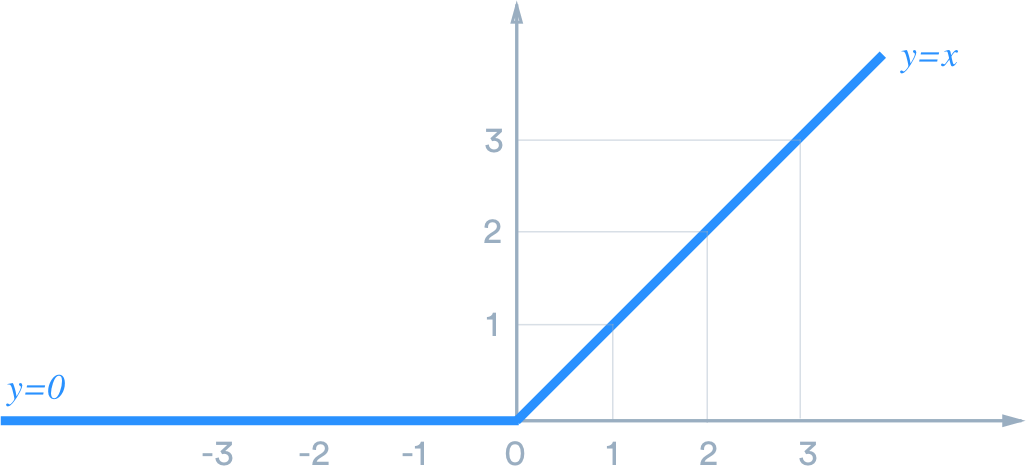

3. ### Sigmoid
\begin{equation} \sigma(x) = \frac{1}{1 + e^{-x}} \end{equation}

Hàm sigmoid được đặt ở lớp cuối cùng của neural network, gọi là output layer. Hàm này sẽ cho ra những kết quả trong khoảng giữa 0 và 1. Đây là hàm quan trọng nhất của bài toán Logistic Regression, vì nó giúp ta xác định được biên giới quyết định (decision boundary).

Trong notebook này, decision boundary của chúng ta sẽ là 0.5. Nếu hàm sigmoid của chúng ta cho ra kết quả > 0.5, khách hàng đó có gửi tiền, Ngược lại, nếu kết quả < 0.5, hành khách đó không gửi tiền.


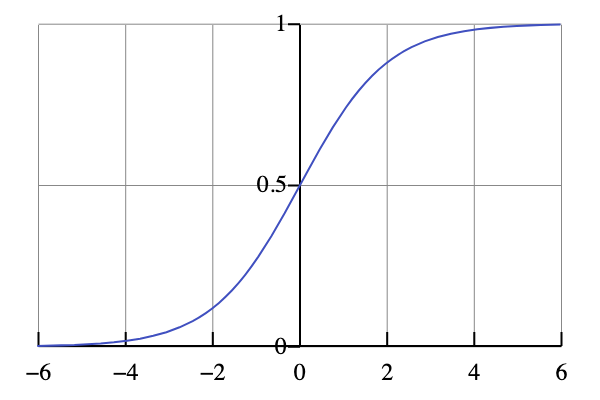

## Tiếp theo, chúng ta sẽ phân tích các bước hoạt động của neural network.

Sau đây ta sẽ cùng phân tích hoạt động của một neural network 2 lớp. Ta sẽ sử dụng thư viện Numpy làm công cụ chủ yếu để xây dựng.

In [ ]:
#Tạo hàm sigmoid
def sigmoid(z):
  ###BEGIN SOLUTION
  return 1/(1 + np.exp(-z))
###END SOLUTION

In [ ]:
#Tạo hàm ReLU
def ReLU(z):
  ###BEGIN SOLUTION
  return np.maximum(0,z)
  ###END SOLUTION

In [ ]:
#Tính đạo hàm của ReLU
def deriv_ReLU(z):
  ###BEGIN SOLUTION
  return (z > 0).astype(z.dtype)
  ###END SOLUTION

In [ ]:
# @title
def test_activation_function():
  assert sigmoid(0) == 0.5
  ###HIDDEN TEST
  assert sigmoid(2) == 1/(1 + np.exp(-2))
  ###HIDDEN TEST
  assert ReLU(0) == 0, "Hàm ReLU khởi tạo sai"
  assert ReLU(2) == 2, "Hàm ReLU khởi tạo sai"
  assert ReLU(-2) == 0, "Hàm ReLU khởi tạo sai"
  assert np.allclose(deriv_ReLU(np.random.uniform(high=0, size=(10, 13))),0), "Đạo hàm của ReLU khởi tạo sai"
  assert np.allclose(deriv_ReLU(np.random.uniform(low=1, high=100, size=(10, 13))),1), "Đạo hàm của ReLU khởi tạo sai"
  print("Chúc mừng bạn đã làm đúng!")

In [ ]:
test_activation_function()

Chúc mừng bạn đã làm đúng!


Đầu tiên ta phải khởi tạo giá trị ban đầu cho các trọng số W1, W2 và độ biến thiên b1, b2. W1 và b1 sẽ phụ trách cho lớp đầu vào, còn W2 và b2 phụ trách lớp thứ 2.

In [ ]:
saved_params = np.load("/content/drive/MyDrive/LogisticRegression_TitanicSurvivor/BankVietnam/SMOTE_2Layers_model_parameters.npz")
W1 = saved_params['W1']
b1 = saved_params['b1']
W2 = saved_params['W2']
b2 = saved_params['b2']

Bước tiếp theo là **Forward Propagation**, hay còn gọi là **lan truyền tịnh tiến**. Ở bước này, ta truyền dữ liệu đầu vào model bằng cách đưa chúng qua các hàm theo thứ tự Linear -> ReLU -> Linear -> Sigmoid. Kết quả từ một hàm sẽ là đầu vào cho hàm tiếp theo.   

Vậy ở mỗi lớp, đầu ra A sẽ dựa theo công thức sau:
\begin{equation}Z^i = W^i*A^{i-1} + b^i\end{equation}
\begin{equation}A^i = g(Z^i)\end{equation}
Trong đó, $A^i$ là đầu ra của lớp đang xét, còn $A^{i-1}$ là dầu ra của lớp trước đó. g() đại diện cho **activation function** (phương trình kích hoạt), và nó sẽ lấy $Z^i$ làm biến.  

Đối với bài toán của chúng ta, activation function sẽ là hàm ReLU đối với lớp ẩn và sigmoid đối với lớp đầu ra.

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  ###BEGIN SOLUTION
  Z1 = X.dot(W1) + b1
  A1 = ReLU(Z1)
  Z2 = A1.dot(W2) + b2
  A2 = sigmoid(Z2)
  return Z1, A1, Z2, A2
  ###END SOLUTION

In [ ]:
# @title
def test_fwd_prop(W1, b1, W2, b2):
  X = np.random.randn(100, 13)
  Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)

  ###HIDDEN TESTS
  # Check values
  assert np.allclose(Z1, X.dot(W1) + b1), "Bạn đã khởi tạo Z1 sai"
  assert np.allclose(A1, ReLU(Z1)), "Bạn đã khởi tạo A1 sai"
  assert np.allclose(Z2, A1.dot(W2) + b2), "Bạn đã khởi tạo Z2 sai"
  assert np.allclose(A2, sigmoid(Z2)), "Bạn đã khởi tạo A2 sai"
  ###HIDDEN TESTS

  print("Chúc mừng bạn đã làm đúng!")

In [ ]:
test_fwd_prop(W1, b1, W2, b2)

Chúc mừng bạn đã làm đúng!


In [ ]:
print("Kích thước của trọng số 1:", W1.shape)
print("Kích thước của bias 1:", b1.shape)
print("Kích thước của trọng số 2:", W2.shape)
print("Kích thước của bias  2:", b2.shape)

Kích thước của trọng số 1: (13, 128)
Kích thước của bias 1: (1, 128)
Kích thước của trọng số 2: (128, 1)
Kích thước của bias  2: (1, 1)


# 4. Thử kết quả dự đoán

Sau đây ta sẽ thử cho model của chúng ta dự đoán trên tập X_val. Model chưa được train trên tập này, nên việc đánh giá model dựa trên một tập data mới giúp đánh giá khách quan hơn

In [ ]:
def make_predict(W1, b1, W2, b2, X):
  _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
  predictions = (A2 >= 0.5).astype(int)
  return predictions

def test_predict(W1, b1, W2, b2, index):
  prediction = make_predict(W1, b1, W2, b2, X_val[index])
  result = "Có gửi tiền" if prediction == 1 else "Không gửi tiền"
  print("Khách hàng số:", index)
  print("Thông tin chung:", X_val[index])
  print("Kết quả dự đoán:", result)
  label = y_val[index][0]
  print("Nhãn (sự thật):", label)

Sau khi chạy cell bên dưới, bạn có thể nhập một số bất kì (nhỏ hơn 8528) để kiếm tra dự đoán của model trên một khách hàng ngẫu nhiên.

In [ ]:
customer_id = int(input("Nhập ID khách hàng: "))
test_predict(W1, b1, W2, b2, customer_id)

Nhập ID khách hàng: 500
Khách hàng số: 500
Thông tin chung: [-0.32367999  1.06240937 -0.13905393  1.87121454 -1.07619473 -0.42694138
  2.85324793  0.42259914 -0.41519085 -0.27431897 -0.40150515  0.52214147
 -0.22294241]
Kết quả dự đoán: Có gửi tiền
Nhãn (sự thật): 1


In [ ]:
print("Tỉ lệ dự đoán chính xác:",get_accuracy(make_predict(W1, b1, W2, b2, X_val), y_val))

Tỉ lệ dự đoán chính xác: 0.8488236814891417
